In [243]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [2]:
# dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
dataframe = pd.read_csv('ecg.csv', header=None)
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [232]:
train_set, valid_set = train_test_split(dataframe, test_size=0.2)
print("original train_set:", train_set.shape)
print("original valid_set:", valid_set.shape)

train_set = np.array(train_set)
valid_set = np.array(valid_set)

train_set, train_labels = train_set[:, :-1], train_set[:, -1:]
valid_set, valid_labels = valid_set[:, :-1], valid_set[:, -1:]

train_set_true_indexes = (train_labels == 1.).squeeze()
train_set_false_indexes = (train_labels == 0.).squeeze()
train_set_cleaned = train_set[train_set_true_indexes]
train_labels_cleaned = train_labels[train_set_true_indexes]
train_labels_anomalous = train_labels[train_set_false_indexes]

train_set_anomalous = train_set[(train_labels == 0.).squeeze()]

print("train_set:", train_set.shape, "train_labels:", train_labels.shape)
print("cleaned: train_set:", train_set_cleaned.shape, "train_labels:", train_labels_cleaned.shape)
print("valid_set:", valid_set.shape, "valid_labels:", valid_labels.shape)

original train_set: (3998, 141)
original valid_set: (1000, 141)
train_set: (3998, 140) train_labels: (3998, 1)
cleaned: train_set: (2358, 140) train_labels: (2358, 1)
valid_set: (1000, 140) valid_labels: (1000, 1)


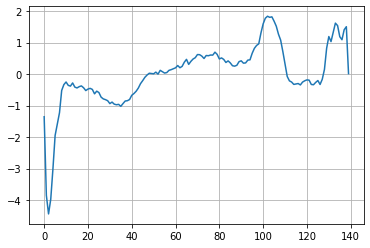

In [58]:
plt.grid()
plt.plot(train_set_cleaned[0])

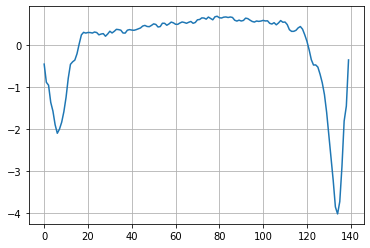

In [60]:
plt.grid()
plt.plot(train_set_anomalous[0])

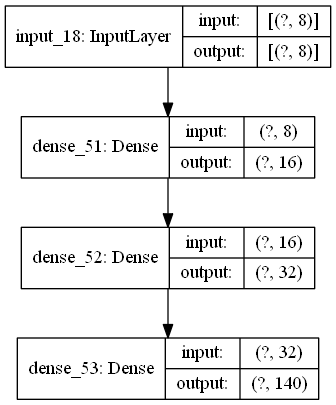

In [93]:
class AnomalyDetection(tf.keras.models.Model):
    def __init__(self):
        super(AnomalyDetection, self).__init__()
        
        self.encoder = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(140)),
            tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dense(16, activation="relu"),
            tf.keras.layers.Dense(8, activation="relu"),
        ])
        self.decoder = tf.keras.models.Sequential([
            tf.keras.layers.InputLayer(input_shape=(8)),
            tf.keras.layers.Dense(16, activation="relu"),
            tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dense(140),
        ])
        
    def call(self, x, training = True):
        x = self.encoder(x)
        x = self.decoder(x)
        
        return x
    
model = AnomalyDetection()
model.compile(loss="mse", optimizer = "adam")

tf.keras.utils.plot_model(model.decoder, show_shapes=True)

In [94]:
history = model.fit(train_set_cleaned, train_set_cleaned, batch_size=32, epochs=50, shuffle=True, validation_data=(valid_set, valid_set))

Epoch 1/50
74/74 [==============================] - 0s 3ms/step - loss: 0.4995 - val_loss: 0.4621
Epoch 2/50
74/74 [==============================] - 0s 2ms/step - loss: 0.1877 - val_loss: 0.4314
Epoch 3/50
74/74 [==============================] - 0s 2ms/step - loss: 0.1659 - val_loss: 0.3727
Epoch 4/50
74/74 [==============================] - 0s 1ms/step - loss: 0.1270 - val_loss: 0.3234
Epoch 5/50
74/74 [==============================] - 0s 1ms/step - loss: 0.1041 - val_loss: 0.3155
Epoch 6/50
74/74 [==============================] - 0s 1ms/step - loss: 0.0945 - val_loss: 0.3170
Epoch 7/50
74/74 [==============================] - 0s 1ms/step - loss: 0.0913 - val_loss: 0.3092
Epoch 8/50
74/74 [==============================] - 0s 1ms/step - loss: 0.0859 - val_loss: 0.2964
Epoch 9/50
74/74 [==============================] - 0s 1ms/step - loss: 0.0833 - val_loss: 0.2841
Epoch 10/50
74/74 [==============================] - 0s 1ms/step - loss: 0.0813 - val_loss: 0.2767
Epoch 11/50
74/74 [

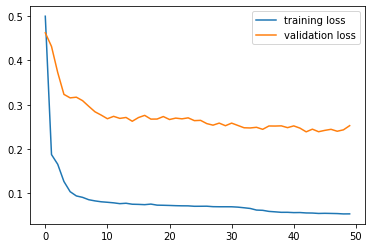

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["training loss", "validation loss"])

In [129]:
def difference(data):
    data = tf.constant(data)
#     print(data)
    data = tf.expand_dims(data, axis = 0)
    prediction = model.predict(data)
    plt.plot(data[0])
    plt.plot(prediction[0])
    plt.fill_between(range(140), data[0], prediction[0])
    plt.show()
    
# difference(train_set[tf.squeeze(train_labels==0)][0])

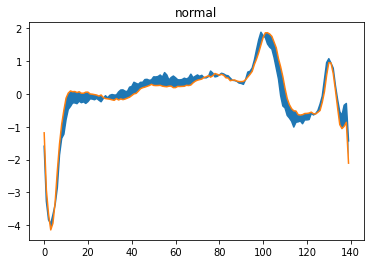

In [131]:
plt.title("normal")
difference(train_set_cleaned[0])

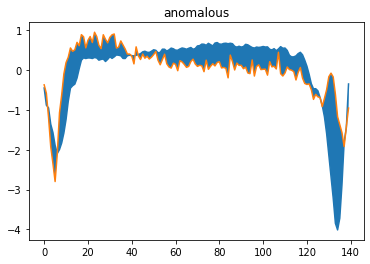

In [132]:
plt.title("anomalous")
difference(train_set_anomalous[0])

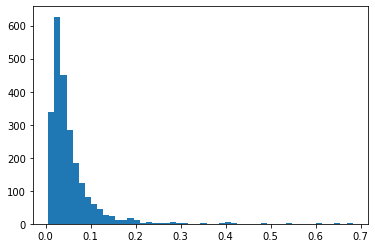

mean 0.053779486566782, std 0.05401314049959183, threshold 0.10779263079166412


In [182]:
def distribution(data):
    predict = model.predict(data)
    reconstruction_error = tf.keras.losses.MSE(data, predict)
#     print(reconstruction_error)
    plt.hist(reconstruction_error.numpy(), bins=50)
    plt.show()
    return np.mean(reconstruction_error.numpy()), np.std(reconstruction_error.numpy())

mean, std = distribution(train_set_cleaned)
print("mean {}, std {}, threshold {}".format(mean, std, mean + std))

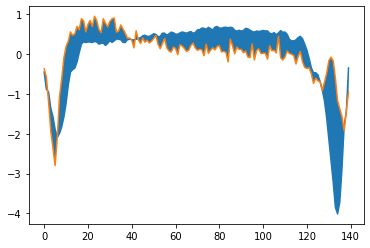

anomaly


In [186]:
def evaluate(data, threshold = mean+std):
    difference(data)
    data = tf.expand_dims(data, axis = 0)
    prediction = model.predict(data)
    loss = tf.keras.losses.MSE(data, prediction)
    
    if(loss > threshold):
        print("anomaly")
    else:
        print("normal")
    
    
evaluate(train_set_anomalous[0])

number of False negative: 5


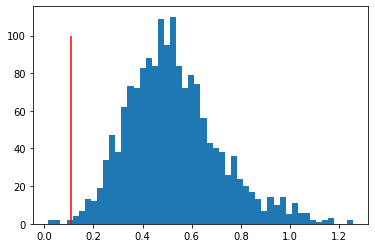

In [213]:
anomaly_pred = model.predict(train_set_anomalous)
losses = tf.keras.losses.MSE(train_set_anomalous, anomaly_pred)
evaluation = losses[losses < (mean  + std)]
print("number of False negative:", evaluation.shape[0])
plt.hist(losses.numpy(), bins=50)
plt.vlines(mean + std, 0, 100, color="r")

In [244]:
def print_stats(data, true_labels, threshold = mean + std):
    true_labels = tf.squeeze(true_labels)
    pred = model.predict(data)
    losses = tf.keras.losses.MSE(data, pred)
    pred_labels = (losses < threshold)

    print("accuracy: ", accuracy_score(true_labels, pred_labels))
    print("precision: ", precision_score(true_labels, pred_labels))
    print("recall: ", recall_score(true_labels, pred_labels))
    print("f1: ", f1_score(true_labels, pred_labels))
    
print("Training set:")
print_stats(train_set, train_labels)
print("Validation set:")
print_stats(valid_set, valid_labels)

Training set:
accuracy:  0.9452226113056528
precision:  0.999066728884741
recall:  0.9079728583545378
f1:  0.95134414574539
Validation set:
accuracy:  0.947
precision:  0.9941634241245136
recall:  0.910873440285205
f1:  0.9506976744186048
